# ARUCO Marcadores

## 1: Creación del  Marker



Python Imaging Library (expansión de PIL) es el paquete de procesamiento de imágenes de facto para el lenguaje Python. Incorpora herramientas livianas de procesamiento de imágenes que ayudan a editar, crear y guardar imágenes.

La biblioteca fomenta la adición de soporte para formatos más nuevos en la biblioteca mediante la creación de nuevos decodificadores de archivos.

La diferencia básica entre la imagen OpenCV y la imagen PIL es que OpenCV sigue la convención de color BGR y PIL sigue la convención de color RGB y el método de conversión se basará en esta diferencia.


## ARUCO
Un marcador ArUco es un marcador cuadrado sintético compuesto por un borde negro ancho y una matriz binaria interior que determina su identificador (id). El borde negro facilita su rápida detección en la imagen y la codificación binaria permite su identificación y la aplicación de técnicas de detección y corrección de errores. El tamaño del marcador determina el tamaño de la matriz interna. Por ejemplo, un tamaño de marcador de 4x4 se compone de 16 bits.

Consiste en una estructura de matriz binaria interna encerrada dentro de un borde exterior de color negro. La estructura de la matriz interna tiene una codificación única basada en la posición del blanco y negro y actúa como un identificador.

Aruco Marker ayuda a la cámara a comprender el ángulo, la altura, la profundidad y otros parámetros y encuentra su caso de uso en interesantes tareas de realidad aumentada y visión por computadora. Por otro lado, el Código QR codifica datos de texto y tiene diferentes propósitos de uso como almacenar contraseñas, identificadores de acceso, sitios web, reservar boletos, nombres de usuario, etc.


https://chev.me/arucogen/



``cv::aruco::PREDEFINED_DICTIONARY_NAME {
  cv::aruco::DICT_4X4_50 = 0,
  cv::aruco::DICT_4X4_100,
  cv::aruco::DICT_4X4_250,
  cv::aruco::DICT_4X4_1000,
  cv::aruco::DICT_5X5_50,
  cv::aruco::DICT_5X5_100,
  cv::aruco::DICT_5X5_250,
  cv::aruco::DICT_5X5_1000,
  cv::aruco::DICT_6X6_50,
  cv::aruco::DICT_6X6_100,
  cv::aruco::DICT_6X6_250,
  cv::aruco::DICT_6X6_1000,
  cv::aruco::DICT_7X7_50,
  cv::aruco::DICT_7X7_100,
  cv::aruco::DICT_7X7_250,
  cv::aruco::DICT_7X7_1000,
  cv::aruco::DICT_ARUCO_ORIGINAL,
  cv::aruco::DICT_APRILTAG_16h5,
  cv::aruco::DICT_APRILTAG_25h9,
  cv::aruco::DICT_APRILTAG_36h10,
  cv::aruco::DICT_APRILTAG_36h11
};``

Cabe señalar que un marcador puede encontrarse girado en el entorno, sin embargo, el proceso de detección necesita poder determinar su rotación original, de modo que cada esquina quede identificada de manera inequívoca. Esto también se hace basándose en la codificación binaria.

Un diccionario de marcadores es el conjunto de marcadores que se consideran en una aplicación específica. Es simplemente la lista de codificaciones binarias de cada uno de sus marcadores.

Un diccionario de marcadores es el conjunto de marcadores que se consideran en una aplicación específica. Es simplemente la lista de codificaciones binarias de cada uno de sus marcadores.

Las principales propiedades de un diccionario son el tamaño del diccionario y el tamaño del marcador.

El tamaño del diccionario es el número de marcadores que lo componen.
El tamaño del marcador es el tamaño de esos marcadores (el número de bits/módulos).
El módulo aruco incluye algunos diccionarios predefinidos que cubren una variedad de diferentes tamaños de diccionario y marcadores.

Se puede pensar que el id del marcador es el número que se obtiene al convertir la codificación binaria a un número de base decimal. Sin embargo, esto no es posible ya que para tamaños de marcadores elevados el número de bits es demasiado alto y gestionar números tan grandes no es práctico.

Antes de su detección, es necesario imprimir marcadores para colocarlos en el medio ambiente. Las imágenes de marcadores se pueden generar usando la ``generateImageMarker()`` función. Esta función toma el diccionario de marcadores, el id del marcador y el tamaño de la imagen de salida como argumentos. La imagen generada contendrá un marcador con el id especificado.

In [3]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

* El primer parámetro es el ``cv::aruco::Dictionaryobjeto`` creado previamente.
* El segundo parámetro es el identificador del marcador, en este caso el marcador 23 del diccionario ``cv::aruco::DICT_6X6_250``. Tenga en cuenta que cada diccionario se compone de un número diferente de marcadores. En este caso, los identificadores válidos van de 0 a 249. Cualquier identificador específico fuera del rango válido producirá una excepción.

generado
generado
generado
generado
generado
generado
generado
generado
generado
generado
generado
generado


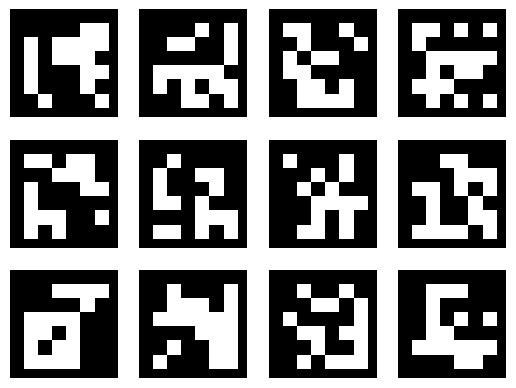

In [4]:
%matplotlib inline
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.generateImageMarker(aruco_dict,i,23, 200,)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")
    print("generado")

plt.savefig("data/markers.pdf")    
plt.show()

## 2: Print, cut, stick and take a picture

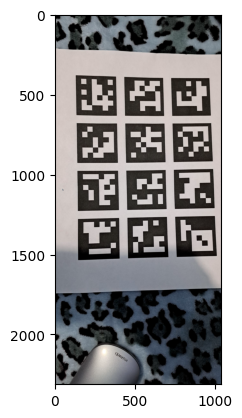

In [5]:
%matplotlib inline
frame = cv2.imread("_data/20240620_214955.jpg")
plt.figure()
plt.imshow(frame)
#plt.show()

## 3: Post processing

In [6]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

parameters =  aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)

#corners, ids, rejectedImgPoints = aruco.detectMarkers(gray,aruco_dict, parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
cv2.imshow('Detected Markers', frame_markers)
cv2.waitKey(0)
cv2.destroyAllWindows()


CPU times: total: 3.03 s
Wall time: 2min 47s


Pretty fast processing !

## 4: Results

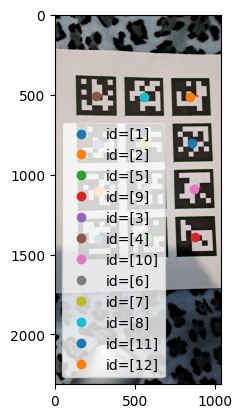

In [7]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [8]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

C:\Users\Propietario\AppData\Local\Temp\ipykernel_21152\2557680753.py:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.unstack().swaplevel(0, 1, axis = 1).stack()


c1      c2      c3      c4      m1      m2      m3      m4  \
marker                                                                     
1      x   145.0   143.0   398.0   402.0   144.0   270.5   400.0   273.5   
       y  1537.0  1282.0  1274.0  1527.0  1409.5  1278.0  1400.5  1532.0   
2      x   143.0   140.0   392.0   398.0   141.5   266.0   395.0   270.5   
       y  1230.0   980.0   979.0  1224.0  1105.0   979.5  1101.5  1227.0   
3      x   140.0   135.0   386.0   392.0   137.5   260.5   389.0   266.0   
       y   930.0   682.0   684.0   928.0   806.0   683.0   806.0   929.0   
4      x   134.0   129.0   380.0   385.0   131.5   254.5   382.5   259.5   
       y   631.0   383.0   391.0   635.0   507.0   387.0   513.0   633.0   
5      x   456.0   452.0   697.0   707.0   454.0   574.5   702.0   581.5   
       y  1526.0  1273.0  1268.0  1518.0  1399.5  1270.5  1393.0  1522.0   
6      x   451.0   445.0   689.0   696.0   448.0   567.0   692.5   573.5   
       y  1223.0   979.0   975.0  1217.0  1101.0   977.0  1096.0  1220.0   
7      x   444.0   439.0   682.0   689.0   441.5   560.5   685.5   566.5   
       y   929.0   684.0   685.0   925.0   806.5   684.5   805.0   927.0   
8      x   437.0   433.0   673.0   680.0   435.0   553.0   676.5   558.5   
       y   635.0   393.0   399.0   636.0   514.0   396.0   517.5   635.5   
9      x   759.0   750.0   996.0  1009.0   754.5   873.0  1002.5   884.0   
       y  1517.0  1267.0  1262.0  1511.0  1392.0  1264.5  1386.5  1514.0   
10     x   748.0   742.0   985.0   995.0   745.0   863.5   990.0   871.5   
       y  1217.0   974.0   968.0  1212.0  1095.5   971.0  1090.0  1214.5   
11     x   740.0   733.0   974.0   984.0   736.5   853.5   979.0   862.0   
       y   924.0   685.0   682.0   919.0   804.5   683.5   800.5   921.5   
12     x   732.0   725.0   962.0   972.0   728.5   843.5   967.0   852.0   
       y   636.0   400.0   400.0   633.0   518.0   400.0   516.5   634.5   

                o  
marker             
1      x   272.00  
       y  1405.00  
2      x   268.25  
       y  1103.25  
3      x   263.25  
       y   806.00  
4      x   257.00  
       y   510.00  
5      x   578.00  
       y  1396.25  
6      x   570.25  
       y  1098.50  
7      x   563.50  
       y   805.75  
8      x   555.75  
       y   515.75  
9      x   878.50  
       y  1389.25  
10     x   867.50  
       y  1092.75  
11     x   857.75  
       y   802.50  
12     x   847.75  
       y   517.25

In [8]:
rejectedImgPoints[1]


array([[[ 348., 1463.],
        [ 347., 1497.],
        [ 210., 1500.],
        [ 212., 1467.]]], dtype=float32)

In [9]:
corners

(array([[[ 145., 1537.],
         [ 143., 1282.],
         [ 398., 1274.],
         [ 402., 1527.]]], dtype=float32),
 array([[[ 143., 1230.],
         [ 140.,  980.],
         [ 392.,  979.],
         [ 398., 1224.]]], dtype=float32),
 array([[[ 456., 1526.],
         [ 452., 1273.],
         [ 697., 1268.],
         [ 707., 1518.]]], dtype=float32),
 array([[[ 759., 1517.],
         [ 750., 1267.],
         [ 996., 1262.],
         [1009., 1511.]]], dtype=float32),
 array([[[140., 930.],
         [135., 682.],
         [386., 684.],
         [392., 928.]]], dtype=float32),
 array([[[134., 631.],
         [129., 383.],
         [380., 391.],
         [385., 635.]]], dtype=float32),
 array([[[ 748., 1217.],
         [ 742.,  974.],
         [ 985.,  968.],
         [ 995., 1212.]]], dtype=float32),
 array([[[ 451., 1223.],
         [ 445.,  979.],
         [ 689.,  975.],
         [ 696., 1217.]]], dtype=float32),
 array([[[444., 929.],
         [439., 684.],
         [682., 685.],
   

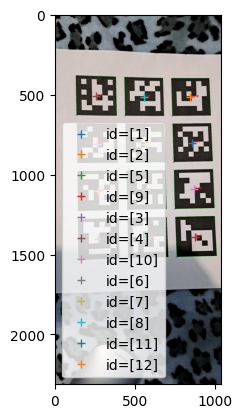

In [10]:
plt.figure()
plt.imshow(frame_markers, origin = "upper")
if ids is not None:
    for i in range(len(ids)):
        c = corners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "+", label = "id={0}".format(ids[i]))
"""for points in rejectedImgPoints:
    y = points[:, 0]
    x = points[:, 1]
    plt.plot(x, y, ".m-", linewidth = 1.)"""
plt.legend()
plt.show()

In [9]:
frame = cv2.imread("_data/20240620_214955.jpg")
sprt_elem = cv2.imread("mini.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

parameters =  aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)
if ids is not None:
    for i in range(len(ids)):
        sp_height,spwidth, cal = sprt_elem.shape
        c = corners[i][0]
        
        new_height = int(data["c1"][i+1]["y"])
        new_width = int(data["c1"][i+1]["x"])
        print(new_height,new_width)
        #print(frame[new_height:new_height+sp_height, new_width:new_width+spwidth])
        
        roi = frame[new_height:new_height+sp_height, new_width:new_width+spwidth]
        if(roi.shape[0] != sprt_elem.shape[0] or roi.shape[1] != sprt_elem.shape[1]):
            print("No se puede colocar el sprite")
        else:
            #break
            frame[new_height:new_height+sp_height, new_width:new_width+spwidth] =sprt_elem
        
        #plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "+", label = "id={0}".format(ids[i]))
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
cv2.imshow('Detected Markers', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1537 145
1230 143
930 140
631 134
1526 456
1223 451
929 444
635 437
1517 759
1217 748
924 740
636 732


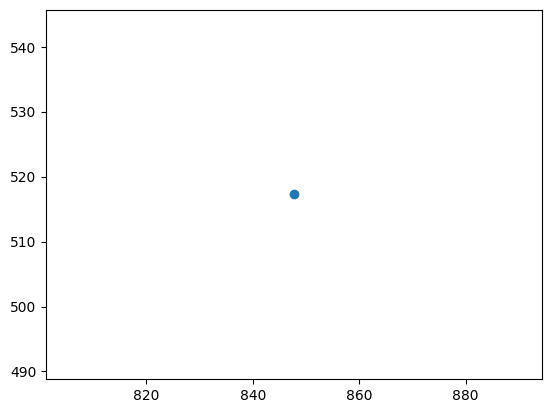

In [18]:
plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))

In [19]:
data["o"][1]["y"]

1405.0